In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\yash-\Downloads\binary_classification_train.csv")

In [4]:
d_np=data.to_numpy()
d_np.shape

(48000, 22)

In [5]:
X=d_np[:,1:21]
y=d_np[:,21]
X_mean=np.mean(X)
X_std=np.std(X)
X_normalize=(X-X_mean)/X_std

In [6]:
X_train=X_normalize[0:38400,:]
X_test=X_normalize[38401:,:]
y_train=y[0:38400]
y_test=y[38401:]

PREDICTIONS [0.0046364  0.23691339 0.02783118 ... 0.03194736 0.07530957 0.75376865]
Accuracy of model is 0.9364517137201792
The F1 score is 0.8947913073473613
LEARNING CURVE


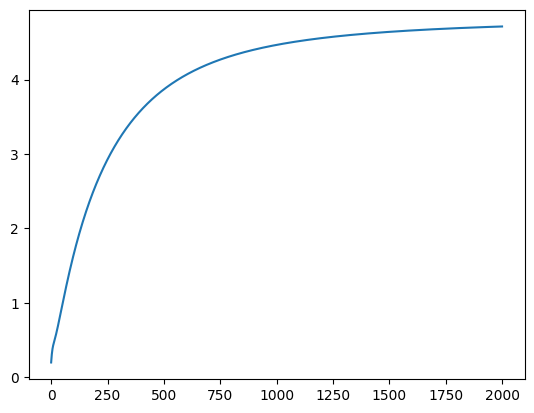

In [8]:
def sigmoid(X):
  return 1/(1+np.exp(-X))
def calculate_gradients(X,y,y_pred):
    n_samples,n_features = X.shape
    dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
    db = (1/n_samples)*np.sum(y_pred-y)
    return dw,db
def cost_function(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
     f_wb=np.dot(w,X[i])+b
     cost+=(f_wb-y[i])**2
    total_cost=(1/(2*m))*cost
    return total_cost
def train(X,y,epochs,lr,lambd):
    
    m,n=X.shape
    w=np.zeros(n)
    b=0
    cost_list=[]
    for epoch in range(epochs):
            linear_pred=np.dot(X,w)+b
            y_pred=sigmoid(linear_pred)
            dw,db=calculate_gradients(X,y,y_pred)
            
            w=w*(1-(lr*lambd)/m)-lr*dw
            b-=lr*db
            
            cost=cost_function(X,y,w,b)
            cost_list.append(cost)
    return w,b,cost_list
def predict(X,w,b):
     linear_pred=np.dot(X,w) +b
     predictions=sigmoid(linear_pred)
     print('PREDICTIONS',predictions)
   
     n_samples=linear_pred.size
     class_pred=np.zeros(n_samples)
     i=0
     while i<n_samples:
        if predictions[i]<0.5:
         class_pred[i]=0
        else:
         class_pred[i]=1
        i+=1
     return class_pred
 
def calculate_precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    if predicted_positives == 0:
        return 0  
    return true_positives / predicted_positives

def calculate_recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    if actual_positives == 0:
        return 0  
    return true_positives / actual_positives

def Calculate_f1(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    if (precision + recall) == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

iters=2000
w_trained,b_trained ,Cost_list=train(X_train,y_train,epochs=iters,lr=.0685,lambd=0.05)
y_hat=predict(X_test,w_trained,b_trained)
def accuracy(y_hat,y):
    return np.sum(y_hat==y)/len(y)
acc=accuracy(y_hat,y_test)
print('Accuracy of model is',acc)
print('The F1 score is',Calculate_f1(y_test,y_hat))

print("LEARNING CURVE")
t=np.arange(0,iters)
plt.plot(t,Cost_list)
plt.show()